In [2]:
import pandas as pd

In [4]:
marked_essays = pd.read_csv('../files/marked_essays_v1.csv')
marked_essays

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,essay id,Has the student written a compelling opening?,Has the student 'shown' and not 'told'?,Has the student used a range of literary devices?,Has the student made an effort to create dynam...,Has the student established a sense of setting?,Has the student varied their sentence structure?,Has the student varied their sentence length?,Has the student written a story that follows t...,Has the student engaged with the prompt?,Has the student included dialogue?,Has the student followed followed the rules of...,Has the student used paragraphs?,Has the student used the five senses in their ...
1,1,3,3,3,3,3,3,3,3,3,3,2,3,3
2,2,3,3,3,3,3,2,3,3,3,3,2,3,2
3,3,0,1,1,1,1,2,1,1,1,1,2,2,0
4,4,2,2,2,2,2,1,1,1,2,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,0,0,0,1,1,1,0,1,1,1,1,1,0
76,76,1,2,2,1,2,2,2,2,1,3,2,2,1
77,77,2,1,1,1,2,0,1,2,1,3,2,2,2
78,78,2,1,1,2,2,1,1,2,0,2,1,2,0


In [5]:
from sklearn.decomposition import PCA


In [6]:
no_head_marked_essays = marked_essays[1:]
no_head_marked_essays[no_head_marked_essays.notnull().all(axis=1)]

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,1,3,3,3,3,3,3,3,3,3,3,2,3,3
2,2,3,3,3,3,3,2,3,3,3,3,2,3,2
3,3,0,1,1,1,1,2,1,1,1,1,2,2,0
4,4,2,2,2,2,2,1,1,1,2,2,2,3,1
5,5,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,0,0,0,1,1,1,0,1,1,1,1,1,0
76,76,1,2,2,1,2,2,2,2,1,3,2,2,1
77,77,2,1,1,1,2,0,1,2,1,3,2,2,2
78,78,2,1,1,2,2,1,1,2,0,2,1,2,0


In [7]:
from IPython.display import display


In [8]:
pd.set_option('display.max_rows', 90)
x = no_head_marked_essays[no_head_marked_essays.notnull().all(axis=1)]

In [9]:
len(x), len(no_head_marked_essays)

(77, 79)

In [10]:
x = x.drop("Unnamed: 0", axis=1)

In [11]:
for k in x.keys():
    x = x[x[k].str.isnumeric()]

In [12]:
len(x)

76

In [13]:
x

,1,2,3,4,5,6,7,8,9,10,11,12,13
1,3,3,3,3,3,3,3,3,3,3,2,3,3
2,3,3,3,3,3,2,3,3,3,3,2,3,2
3,0,1,1,1,1,2,1,1,1,1,2,2,0
4,2,2,2,2,2,1,1,1,2,2,2,3,1
5,3,3,3,3,3,3,3,3,3,3,3,3,3
6,1,1,1,1,1,1,0,1,1,1,0,1,1
7,2,2,3,3,2,3,3,2,3,2,2,3,3
8,1,2,2,3,2,2,2,2,3,3,3,2,1
9,3,2,1,1,1,0,0,1,2,1,1,2,1
10,2,1,1,1,1,1,1,1,2,1,1,1,0


In [ ]:
from sklearn.decomposition import PCA


In [15]:
x=x.astype(int) #.dtypes

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>],
       [<AxesSubplot:title={'center':'13'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

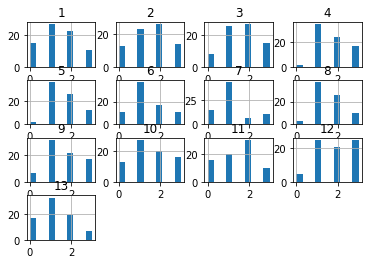

In [16]:
x.hist()

In [ ]:
pca = PCA(n_components=14)
pca.fit(x)


PCA(n_components=14)

In [ ]:
import matplotlib.pyplot as plt


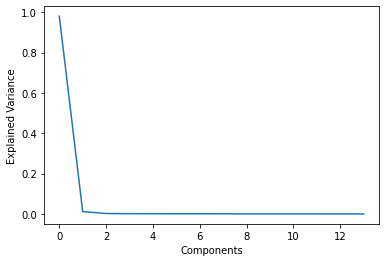

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()


In [ ]:
pca.explained_variance_ratio_.shape

(13,)

In [ ]:
normalized_x = (x-x.mean())/x.std()

In [ ]:
normalized_x.shape

(76, 14)

In [ ]:
normalized_x.shape[1]

14

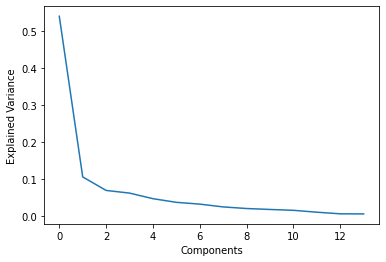

In [ ]:
pca_normalized = PCA(n_components=normalized_x.shape[1])
pca_normalized.fit(normalized_x)
plt.plot(pca_normalized.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

In [ ]:
columns = normalized_x.columns.tolist()
columns[10] = columns[0]
columns[0] = '10'
columns

['10',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'Unnamed: 0',
 '11',
 '12',
 '13']

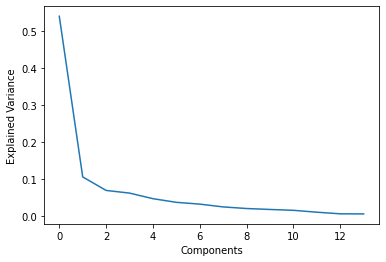

In [ ]:
pca = PCA(n_components=normalized_x.shape[1])
pca.fit(normalized_x[columns])
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

In [ ]:
pca.singular_values_

array([23.78772021, 10.55565835,  8.55419268,  8.10156498,  7.05894134,
        6.28506924,  5.86862509,  5.15280628,  4.69140641,  4.39762164,
        4.11153818,  3.4048903 ,  2.64634211,  2.59623463])

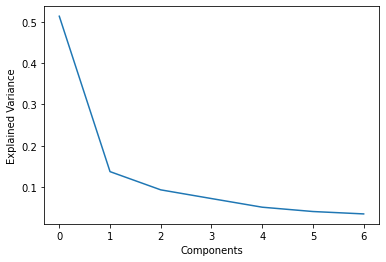

In [ ]:
pca = PCA(n_components=7)
pca.fit(normalized_x[columns[5:]])
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

In [ ]:
pca.singular_values_

array([18.61987529,  9.62597088,  7.92839261,  6.97346119,  5.87351306,
        5.23824491,  4.84978334])

In [ ]:
my_model = PCA(n_components=0.9, svd_solver='full')
my_model.fit_transform(normalized_x)
my_model.singular_values_

array([23.78772021, 10.55565835,  8.55419268,  8.10156498,  7.05894134,
        6.28506924,  5.86862509,  5.15280628])

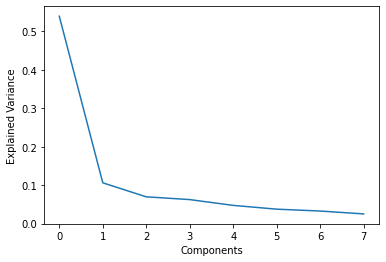

In [ ]:

plt.plot(my_model.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

In [ ]:
my_model.components_.shape

(8, 14)

In [ ]:
pd.DataFrame(my_model.components_.T, index=normalized_x.columns)

,0,1,2,3,4,5,6,7
Unnamed: 0,-0.016627,-0.452432,0.791563,-0.166950,-0.196928,-0.150983,0.081214,-0.011977
1,0.229841,0.126364,0.039784,0.683253,-0.310955,0.150858,-0.219891,0.144397
2,0.319546,0.047612,0.247308,0.055718,0.210262,0.218663,-0.116511,-0.172548
3,0.327506,0.049768,0.207826,0.067293,0.231428,0.177355,-0.100660,-0.132645
4,0.296628,0.203720,0.052742,-0.072566,0.199764,0.284687,0.335951,-0.467326
5,0.309119,0.047018,0.134664,0.102909,-0.137908,-0.056160,-0.219585,0.042299
6,0.288757,0.035716,-0.109509,-0.429073,0.253131,-0.002101,-0.196268,0.064189
7,0.294011,-0.049084,-0.124640,-0.326187,-0.000049,0.118192,-0.118646,0.595066
8,0.260263,0.240650,0.109906,-0.257139,-0.511086,0.232346,0.244537,0.215211
9,0.236911,0.326737,-0.104682,-0.178514,-0.407698,-0.599761,-0.059387,-0.361792


In [ ]:
pd.DataFrame(pca_normalized.components_.T, index=normalized_x.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Unnamed: 0,-0.016627,-0.452432,0.791563,-0.166950,-0.196928,-0.150983,0.081214,-0.011977,-0.057385,-0.178166,-0.183814,0.051724,-0.023681,-0.014430
1,0.229841,0.126364,0.039784,0.683253,-0.310955,0.150858,-0.219891,0.144397,-0.131190,-0.256187,-0.407981,-0.002525,0.155697,-0.024374
2,0.319546,0.047612,0.247308,0.055718,0.210262,0.218663,-0.116511,-0.172548,-0.082595,0.003382,0.355517,-0.419253,0.151786,-0.603282
3,0.327506,0.049768,0.207826,0.067293,0.231428,0.177355,-0.100660,-0.132645,-0.052691,-0.070081,0.210609,-0.275543,-0.092787,0.770211
4,0.296628,0.203720,0.052742,-0.072566,0.199764,0.284687,0.335951,-0.467326,-0.126293,-0.114695,-0.178820,0.585309,-0.033072,-0.074109
5,0.309119,0.047018,0.134664,0.102909,-0.137908,-0.056160,-0.219585,0.042299,0.788923,0.112504,0.194117,0.295512,-0.195936,-0.053608
6,0.288757,0.035716,-0.109509,-0.429073,0.253131,-0.002101,-0.196268,0.064189,0.217547,-0.013211,-0.687334,-0.297846,-0.026628,-0.056362
7,0.294011,-0.049084,-0.124640,-0.326187,-0.000049,0.118192,-0.118646,0.595066,-0.209206,-0.470616,0.266395,0.262711,-0.019290,-0.038258
8,0.260263,0.240650,0.109906,-0.257139,-0.511086,0.232346,0.244537,0.215211,-0.110751,0.550052,-0.009023,-0.060047,0.221295,0.085797
9,0.236911,0.326737,-0.104682,-0.178514,-0.407698,-0.599761,-0.059387,-0.361792,-0.143991,-0.275186,0.100740,-0.131397,-0.099923,-0.008950
